In [ ]:
!pip install keras==2.2.2
!pip install tensorflow==1.15
!pip install tensorflow-gpu==1.15
!pip install h5py==2.10.0 --force-reinstall
!pip install pillow==7.0.0

     |████████████████████████████████| 299 kB 28.3 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.2.2 which is incompatible.
tensorflow 2.6.0 requires keras-preprocessing~=1.1.2, but you have keras-preprocessing 1.0.2 which is incompatible.
     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 503

     |████████████████████████████████| 2.1 MB 37.9 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 7.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [ ]:
!wget https://github.com/rickiepark/deep-learning-with-python-notebooks/archive/master.zip
!unzip master.zip
!mv deep-learning-with-python-notebooks-master/datasets ./

--2021-10-16 07:44:40--  https://github.com/rickiepark/deep-learning-with-python-notebooks/archive/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/rickiepark/deep-learning-with-python-notebooks/zip/master [following]
--2021-10-16 07:44:40--  https://codeload.github.com/rickiepark/deep-learning-with-python-notebooks/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [    <=>             ]  74.75M  10.3MB/s               

In [ ]:
import os, shutil

# 원본 데이터 경로
original_dataset_dir = '/content/datasets/cats_and_dogs/train'

# 저장 경로
base_dir = '/content/datasets/cats_and_dogs/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 이미 디렉토리가 존재하면 삭제하고 새로 만듬.
    shutil.rmtree(base_dir)  
os.mkdir(base_dir)

# 학습, 검증, 테스트 데이터 경로 설정
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

# 학습 완료후 저장했던 모델 불러오기
model = load_model('/content/drive/MyDrive/cats_and_dogs_small_2.h5')
model.summary() 

TypeError: ignored

In [ ]:
img_path = '/content/datasets/cats_and_dogs/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

# 이미지를 4D 텐서로 변경
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)

# 배치 차원이 추가됨
img_tensor = np.expand_dims(img_tensor, axis=0)

# np.expand_dims 보충 : https://rfriend.tistory.com/428

# 정규화
img_tensor /= 255.

# 이미지 텐서의 크기는 (1, 150, 150, 3)
print(img_tensor.shape)

(150, 150, 3)
(1, 150, 150, 3)


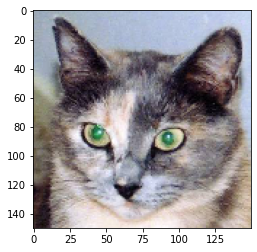

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from keras import models

# 상위 8개 층의 출력을 추출
layer_outputs = [layer.output for layer in model.layers[:8]]

In [ ]:
# 모델 구조
model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
# 모델의 모든 layer
model.layers

In [ ]:
# 7번째 layer의 출력 (conv2d_11 연산에 의해 batch x 15 x 15 x 128 크기의 feature map 출력)
model.layers[6].output

<KerasTensor: shape=(None, 15, 15, 128) dtype=float32 (created by layer 'conv2d_11')>

In [ ]:
# 모델의 입력
model.input

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_8_input')>

In [ ]:
# 모델의 입력에 대해 8개 층의 출력 feature map을 반환하는 모델
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0   

In [ ]:
# 층의 활성화마다 하나씩 8개의 넘파이 배열로 이루어진 리스트를 반환
activations = activation_model.predict(img_tensor)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: list index out of range
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
# 하위 8개 layer 각각에 대한 feature map 출력을 저장
len(activations)

8

In [ ]:
# 첫 번째 합성곱 층의 feature map 
first_layer_activation = activations[0]

# 32개의 채널을 가진 148 x 148 크기의 feature map (numpy 배열)
print(first_layer_activation.shape)

(1, 148, 148, 32)


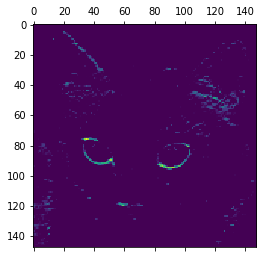

In [ ]:
# 32개의 채널 중 20번 째 채널의 출력값
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')
plt.show()

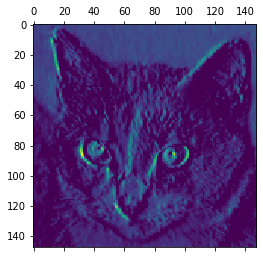

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')
plt.show()

### 네트워크의 모든 feature map 시각화

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
# 네트워크를 구성하는 층의 이름
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

print(layer_names)

['conv2d_8', 'max_pooling2d_8', 'conv2d_9', 'max_pooling2d_9', 'conv2d_10', 'max_pooling2d_10', 'conv2d_11', 'max_pooling2d_11']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


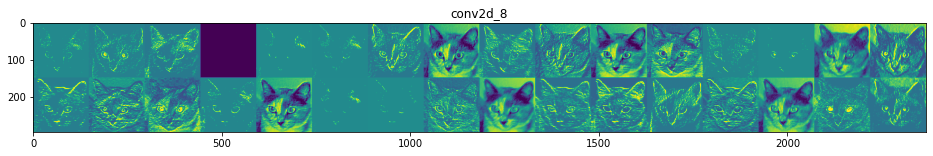

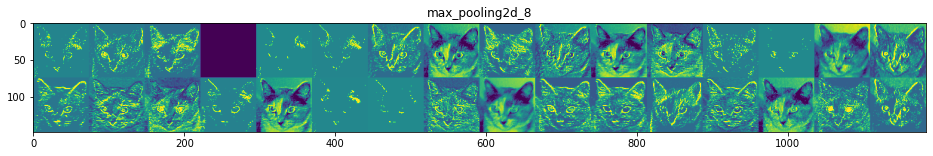

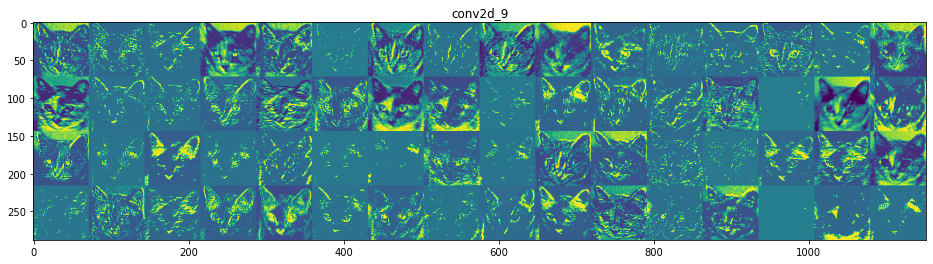

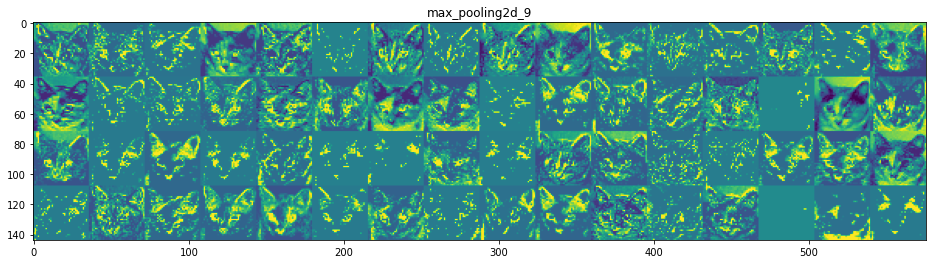

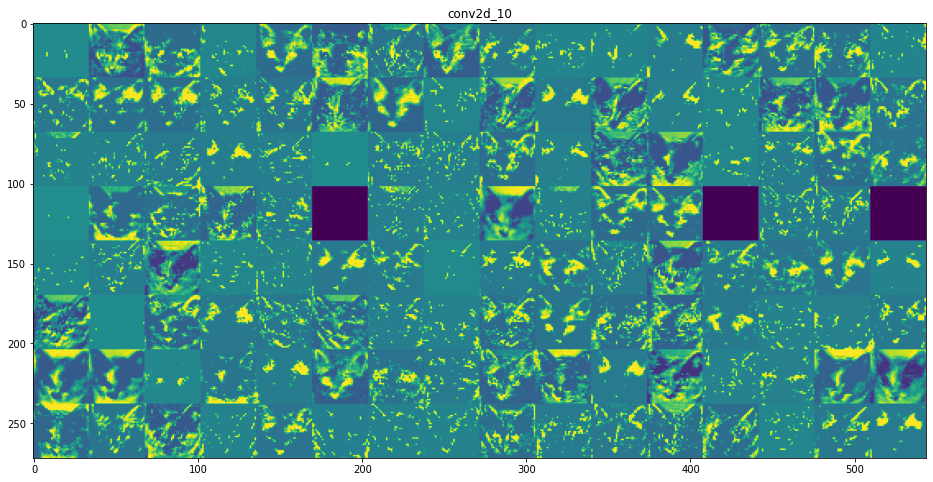

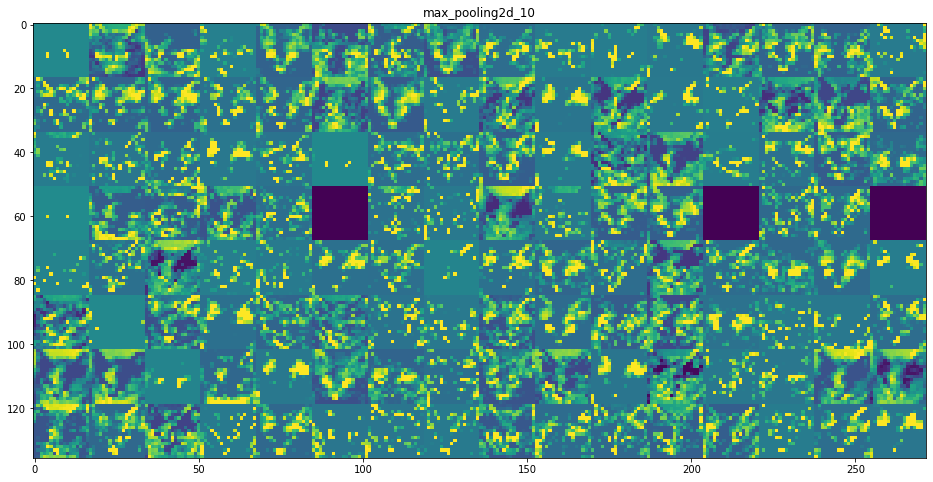

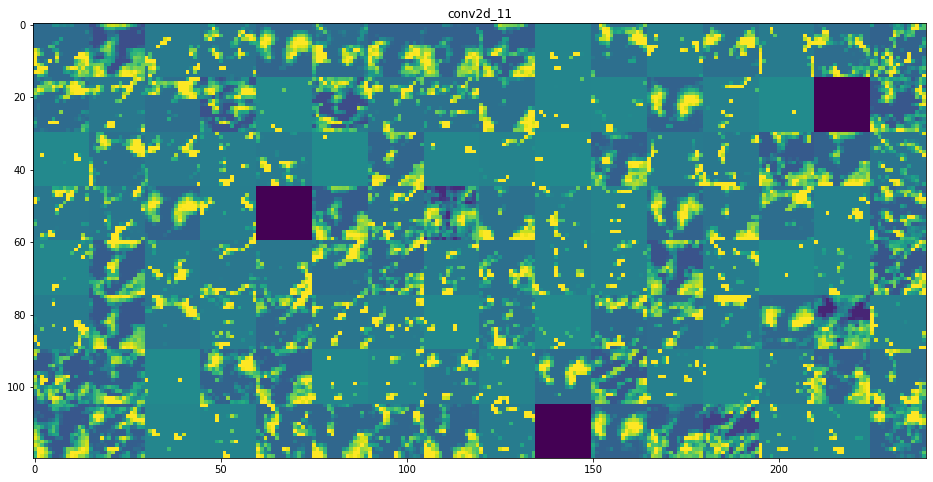

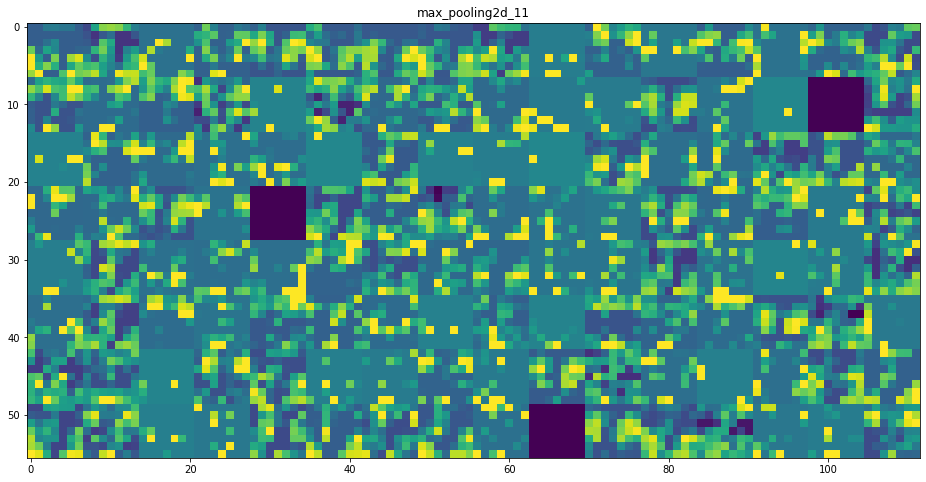

In [ ]:
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # activations : 하위 8개 layer 각각에 대한 feature map 출력을 저장

    # feature map 크기 : (1, size, size, n_features)
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    # 적절한 그리드 크기
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]

            # 특성 전처리
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드 출력
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()


아래 쪽으로 갈 수록 네트워크의 상위층

* 첫 번째 층 : 에지 감지기, 초기 입력 이미지의 거의 모든 정보를 보존
* 상위 층으로 갈 수록 추상적, 시각적으로 이해하기 어려워짐
  - 이미지의 시각적 컨텐츠에 관한 정보가 줄어들고, 이미지 클래스에 특화된 정보가 증가
  - 활성화되지 않는 필터들이 생김 (필터에 인코딩된 패턴이 입력에 나타나지 않음)


층에서 추출한 특성은 층의 깊이를 따라 점점 추상화. 상위층일 수록 특정 입력에 관한 시각적 정보가 줄어들고 타깃에 관한 정보가 증가

신경망 모델은 입력 이미지에 대한 정보 정제 파이프라인처럼 작동
  - 반복적인 변환을 통해 관계 없는 정보(이미지의 특정 요소)를 걸러내고, 유용한 정보(클래스에 특화된 정보)는 강조하고 개선할 수 있도록 함
  - 추상적으로 학습함